# Car Consumtion Study

## General informations


### A bit of context

Car consumption is a key element from many points of view (ecology, cost, fuel choice for a new car, ...). Most of the time, consumptions annouced by car constructors are not reflecting consumptions observed in real use-cases. The goal of this work is to analyze 280 car travels in order to estimate the real car consumption of the studied case, and understand how to possibly optimize it. The first part focuses on the analysis of the travels (distance, duration, etc...) while the second part focuses on the consumption.


### Data description

The data associated to the 280 car travels to be analyzed are provided *via* a `csv` file containings 7 informatios for each travel:
  1. `distance_Km`: travel distance [unit: kilometer],
  1. `conso_L100km`: averaged consomation of the travel [unit: Liter / 100 km]
  1. `duration_H`: duration of the travel [unit: hours, *e.g.* 0.3 means $60 \times 0.3 = 18\,$min]
  1. `price_EuroL`: price of the fuel for this travel [unit: Euros / Liter]
  1. `dayTime_H`: hour of the day at which the travel was done [number between 0 and 23)]
  1. `weekDay`: day of the week at which the travel was done [number between 1 (monday) and 7 (sunday)]
  1. `yearMonth`: month of the year at which the travel was done [number between 1 (january) and 12 (december)]

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [2]:
df = pd.read_csv('../../../data/CarData.csv')
df.head()

,distance_Km,conso_L100km,duration_H,price_EuroL,dayTime_H,weekDay,yearMonth
0,15.5,5.6,0.550000,1.34,7,1,2
1,12.4,4.5,0.216667,1.45,19,7,2
2,4.5,4.0,0.133333,1.45,18,7,2
3,0.4,11.7,0.033333,1.45,18,7,2
4,0.5,10.6,0.066667,1.45,11,7,2


## Part I : travel analysis

### 1. Average values

 - what is the average traveled distance (in km)?

In [3]:
DistMean = np.mean(df['distance_Km'])
print('< Distance > = {:.1f} km'.format(DistMean))

< Distance > = 16.7 km


 - what is the average travel duration (in minutes)?

In [4]:
DuraMean = np.mean(df['duration_H'])
print('< Duration > = {:.1f} min'.format(DuraMean * 60))

< Duration > = 20.9 min


 - *bonus:* are these averages representative of the sample ? A quantitative criteria and a discussion are expected.

In [5]:
DistRMS = np.sqrt(np.mean( (df['distance_Km']-DistMean)**2 ))
print('RMS[ Distane  ] = {:.1f} km'.format(DistRMS))

DuraRMS = np.sqrt(np.mean( (df['duration_H']-DuraMean)**2 ))
print('RMS[ Duration ] = {:.1f} min'.format(DuraRMS*60))

RMS[ Distane  ] = 37.3 km
RMS[ Duration ] = 22.0 min


### 2. Distributions

 - plot the histogram of the traveled distances

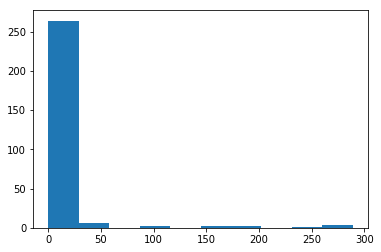

In [6]:
plt.hist(df['distance_Km']);

 - plot the histogram of the travel durations

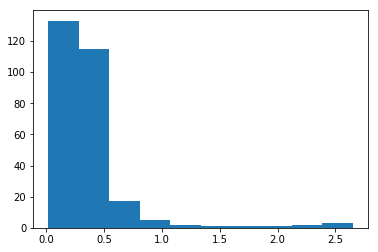

In [7]:
plt.hist(df['duration_H']);

 - compute the distance $D$ which satisfies $f_{\text{travels}}(d<D) = 90\%$ (with a precision of 1\%), where $f_{\text{travels}}(d<D)$ is the fraction of travels having a distance below $D$. Improve the histogram of distances using this information.

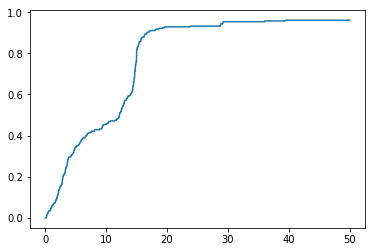

In [8]:
# Get the numpy array of distances
distances = df['distance_Km'].values

# Get the number of travels
nTot = len(distances)

# Compute the fraction of travels satisfying d<D
def frac(D):
    return np.count_nonzero(distances<D) / nTot 

# Scan the threshold distance D and compute f(D) 
Ds = np.linspace(0, 50, 1000)
fractions = np.array([frac(D) for D in Ds])

# Plot f(D)
plt.plot(Ds, fractions);

In [9]:
# Get D90 for which f(D) = 0.9 by finding the index
# for which abs(f-90) is minimal.
delta = np.abs(fractions - 0.9)
D90 = Ds[np.argmin(delta)]
print('D90 = {:.2f} km'.format(D90))

# Check the precision by looking at the difference
# with next and previous distances D
D90plus  = Ds[np.argmin(delta)+1]
D90minus = Ds[np.argmin(delta)-1]
print('Relative precision: {:.1f}%'.format((D90plus-D90minus)/D90*100))

D90 = 16.72 km
Relative precision: 0.6%


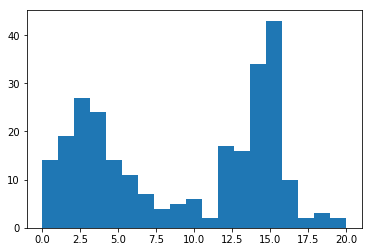

In [10]:
# Perform the histogram, focusing on shorter trips typically from 0 to 20 km.
plt.hist(df['distance_Km'], bins=np.linspace(0, 20, 20));

 - compute the averaged speed for *each travel* (in km/h) and plot the corresponding distribution. Add this information to the original dataframe

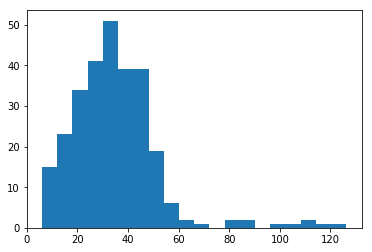

In [11]:
# Speed = distance / time
df['speed_KmH'] = df['distance_Km'] / df['duration_H']

# Plot the histogram of aveSpeed
plt.hist(df['speed_KmH'], bins=20);

### 3. Is there a favored time to travel?

Are there some periods of the day (*e.g.* morning or afternoon), some days of the week (*e.g.* sunday or monday), having more travels?

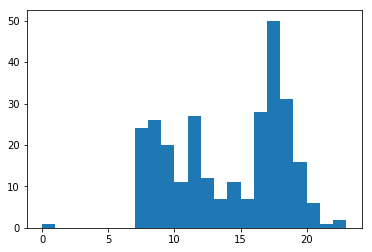

In [12]:
# Plot the histogram of the day hour
plt.hist(df['dayTime_H'], bins=np.linspace(0, 23, 24));

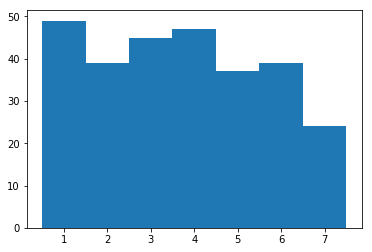

In [13]:
# Plot the histogram of the day of the week
plt.hist(df['weekDay'], bins=np.linspace(0.5, 7.5, 8));

## Part II: consumption analysis

### 1. Typical consumption values

What are the minimum, mean and maximum consumptions?

In [14]:
print('MAX [ conso ] = {:.1f} L/100km'.format(np.max(df['conso_L100km'])))
print('MEAN[ conso ] = {:.1f} L/100km'.format(np.mean(df['conso_L100km'])))
print('MIN [ conso ] = {:.1f} L/100km'.format(np.min(df['conso_L100km'])))

MAX [ conso ] = 11.7 L/100km
MEAN[ conso ] = 5.9 L/100km
MIN [ conso ] = 3.6 L/100km


### 2.  Distributions

 - Plot the distribution of the consumptions.

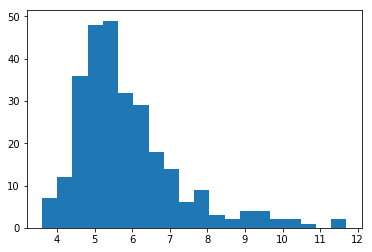

In [15]:
# Plot the histogram of the day of the week
plt.hist(df['conso_L100km'], bins=20);

 - How this distribution changes when a sub-set of travels (*e.g.* long, short, fast slow, ...) is selected?

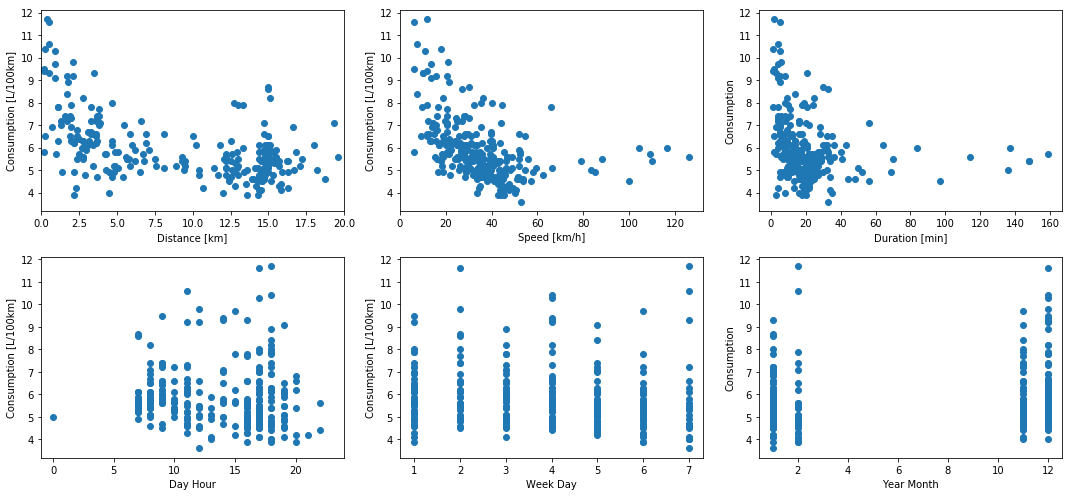

In [16]:
# Option 1: few scatter plots by hand
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.scatter(df['distance_Km'], df['conso_L100km'])
plt.xlabel('Distance [km]')
plt.ylabel('Consumption [L/100km]')
plt.xlim(0, 20);

plt.subplot(2, 3, 2)
plt.scatter(df['speed_KmH'], df['conso_L100km'])
plt.xlabel('Speed [km/h]')
plt.ylabel('Consumption [L/100km]')

plt.subplot(2, 3, 3)
plt.scatter(df['duration_H']*60, df['conso_L100km'])
plt.xlabel('Duration [min]')
plt.ylabel('Consumption');

plt.subplot(2, 3, 4)
plt.scatter(df['dayTime_H'], df['conso_L100km'])
plt.xlabel('Day Hour')
plt.ylabel('Consumption [L/100km]')
plt.xlim(-1, 24);

plt.subplot(2, 3, 5)
plt.scatter(df['weekDay'], df['conso_L100km'])
plt.xlabel('Week Day')
plt.ylabel('Consumption [L/100km]')

plt.subplot(2, 3, 6)
plt.scatter(df['yearMonth'], df['conso_L100km'])
plt.xlabel('Year Month')
plt.ylabel('Consumption')

plt.tight_layout();

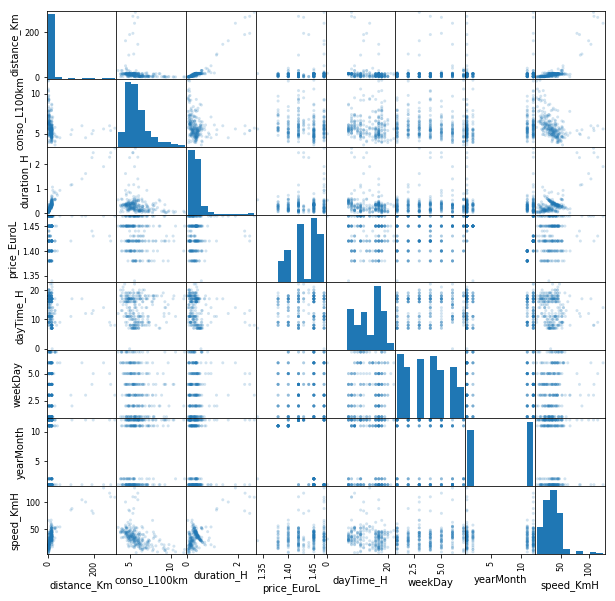

In [17]:
# Option 2: use pandas function for scatter matrix 
#           and look at the line 'conso_L100km'.
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10));

 - According to you, is the maximum consumption found above representative?

In [18]:
# Print caracteristics of travels with conso > 10 L/100km
# using fancy indexing based on a condition.
highConso = df['conso_L100km']>10
df[highConso].head(-1)

,distance_Km,conso_L100km,duration_H,price_EuroL,dayTime_H,weekDay,yearMonth,speed_KmH
3,0.4,11.7,0.033333,1.45,18,7,2,12.0
4,0.5,10.6,0.066667,1.45,11,7,2,7.5
158,0.9,10.3,0.083333,1.43,17,4,12,10.8
180,0.3,10.4,0.016667,1.42,18,4,12,18.0


 + Can you isolate types of travels having a generally lower consumption?

Short and slow (low speed) travels tend to consume more fuel than long and fast (high *averaged* speed).